# Section 1: Linear Regression Application 1: Cross-sectional data 

Cross-sectional data refers to observations collected at a single point in time, capturing a snapshot of multiple entities, such as individuals, firms, industries, or countries. Cross-sectional data emphasizes variations and relationships across different entities at a specific moment. 

In this section we will apply a sample cross-sectional data to run linear regression. I select a real estate data set tretrieved from Kaggle about Melbourne Housing Snapshot. 

In [1]:
#first we need to any packages that we need to use
import pandas as pd
import numpy as np 
import yfinance as yf 
import statsmodels.api as sm 
import matplotlib.pyplot as plt

In [2]:
#step 1: get the data

#when we import csv file, we use pd.read_csv('file_name.csv')

#be careful with the file path, if the file is in the same folder as the script, you can just use the file name. If not you need to specify the path.

housing = pd.read_csv("melb_data.csv")

#lets see the first 5 rows of the data to get the structure
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
#maybe we need to see some basic statistics of each numeric column the data

housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
# we can also see the data types of each column

housing.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [5]:
#we can find that this data has 21 columns, and some of them are categorical, some of them are numeric.

#also, there's some missing value in the data, for example, the building area, yearbuilt have missing values. (Obs not equal to 13580)

# maybe we need to clean the data first, we can drop the missing values before running the regression model.


housing = housing.dropna()

#now we can see the data after dropping the missing values

housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [6]:
#now this dataset is ready to go. We can check the word document I posted in brightspace for the detailed information for each column.

#or we can simply run a code to see the correlation between each column


#get a dataset with only numeric columns

housing_numeric = housing.select_dtypes(include=[np.number]) #this code will select only the numeric columns

#if you want to select the categorical columns, you can use the code below

#housing_categorical = housing.select_dtypes(include=[np.object])

housing_numeric.corr()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.533505,0.283885,0.051237,0.951793,0.613853,0.422526,0.098755,0.608215,-0.068122,0.016049,0.088031,-0.111422
Price,0.533505,1.000000,-0.148867,0.125539,0.514561,0.503922,0.261507,0.081419,0.530574,-0.304633,-0.213574,0.211760,-0.046410
Distance,0.283885,-0.148867,1.000000,0.405729,0.290242,0.124530,0.273615,0.059369,0.159603,0.246291,-0.094494,0.221861,-0.083969
Postcode,0.051237,0.125539,0.405729,1.000000,0.053770,0.109804,0.043713,0.025807,0.078483,0.024375,-0.425172,0.471305,0.064534
Bedroom2,0.951793,0.514561,0.290242,0.053770,1.000000,0.617751,0.425726,0.097172,0.593000,-0.056343,0.021309,0.085895,-0.109401
Bathroom,0.613853,0.503922,0.124530,0.109804,0.617751,1.000000,0.340808,0.076295,0.534425,0.157820,-0.072020,0.116103,-0.067126
Car,0.422526,0.261507,0.273615,0.043713,0.425726,0.340808,1.000000,0.117647,0.334282,0.108714,0.011973,0.054699,-0.046487
Landsize,0.098755,0.081419,0.059369,0.025807,0.097172,0.076295,0.117647,1.000000,0.084825,0.026518,0.005610,0.032918,-0.017784
BuildingArea,0.608215,0.530574,0.159603,0.078483,0.593000,0.534425,0.334282,0.084825,1.000000,0.005836,-0.037904,0.103613,-0.066144
YearBuilt,-0.068122,-0.304633,0.246291,0.024375,-0.056343,0.157820,0.108714,0.026518,0.005836,1.000000,0.057108,-0.002114,-0.000797


In [7]:
#now I want to investigate the determinant of housing price.

#I will use the price as the dependent variable and the rooms (number of rooms).

#obviously house with more room will have higher price. But linear regresion will help us to quantify the numeric relationship between the number of rooms and the price.

X = housing_numeric['Rooms'] #independent variable

Y = housing_numeric['Price'] #dependent variable

#then we need to add a constant to the independent variable

X = sm.add_constant(X)

#then we can run the regression analysis

model = sm.OLS(Y, X).fit()


#lets see the summary of the regression analysis

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     2464.
Date:                Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:51:28   Log-Likelihood:                -90921.
No. Observations:                6196   AIC:                         1.818e+05
Df Residuals:                    6194   BIC:                         1.819e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.851e+04   2.31e+04     -0.802      0.4

In [8]:
# the coefficient of the number of rooms is 3.709 * 10^5, which means that for each additional room, the price of the house will increase by 3.709 * 10^5.

# Obviously, Rooms will not be the only variable to interpret the housing price in Melbourne. Now I will try to add more variables to the model.

X = housing_numeric[['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']] #you need to have to square brackets to select multiple columns

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit() 

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1197.
Date:                Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:51:29   Log-Likelihood:                -89862.
No. Observations:                6196   AIC:                         1.797e+05
Df Residuals:                    6190   BIC:                         1.798e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.212e+07   3.28e+05     36.943   

In [9]:
# This model is much better comparing with the previous one, with only one variable.

#the R-squared value is 0.492, whereas previously it was 0.285.

#To interpret the R-squared, the model with 5 variables can explain 49.2% of the variance in the housing price.

#Now we can try to add all numerice variable into the regression model.


X = housing_numeric.drop('Price', axis=1) #drop the dependent variable

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     779.2
Date:                Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:51:29   Log-Likelihood:                -89104.
No. Observations:                6196   AIC:                         1.782e+05
Df Residuals:                    6183   BIC:                         1.783e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.495e+08   9.03e+06    -16.563

In [10]:
#try to interpret this regression model result by yourself. 








In [11]:
#One thing that we need to be careful is the multicollinearity.

# based on the previous results, the table provides a note that 

#"The condition number is large, 1.53e+07. This might indicate that there are strong multicollinearity or other numerical problems."

#This means that the independent variables are highly correlated with each other.

#now revisit the independent variable we include in the regression, the variable "Rooms" and "Bedroom2" are highly correlated with each other.

#let's have a quick check the correlation between these two


housing_numeric[['Rooms', 'Bedroom2']].corr()



,Rooms,Bedroom2
Rooms,1.000000,0.951793
Bedroom2,0.951793,1.000000


In [12]:
# Obviously, these two variables are highly correlated with each other. Including both of them in the regression model will cause multicollinearity.

# One way to solve this problem is to drop one of the variables, I select to drop "Bedroom2"

#now rerun the regression

X = housing_numeric.drop(['Price', "Bedroom2"], axis=1) #drop the dependent variable and "Bedroom2"

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     849.9
Date:                Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:51:29   Log-Likelihood:                -89105.
No. Observations:                6196   AIC:                         1.782e+05
Df Residuals:                    6184   BIC:                         1.783e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.494e+08   9.03e+06    -16.548

In [13]:
# by comparing two different regression model, we can see that removing the "Bedroom2" variable will not affect the R-squared value, but it will reduce the multicollinearity problem.

# We can see the note for potential multicollinearity is still there, but the condition number is reduced to 1.53e+07 to 1.33e+07.

# in-class discussion: Try to find the multicollinearity problem in the regression model and solve it by yourself.











# Section 2: Linear Regression Application 2: CAPM
Capital Asset Pricing Model (CAPM) is one of the most important pricing model in finance, identified as:
$$
E(R_i)=r_f+\beta \times E(R_m - r_f)
$$
where:
- **\( $E(R_i)$ \)**: Expected return of asset i.
- **\( $r_f$ \)**: Risk-free rate.
- **\( $R_m$\)**: Return of market portfolio.
- **\( $\beta$ \)**: Measure the sensitivity of the change in $E(R_i)$ when $E(R_m)$ changes.
Based on the linear regression theory, the intercept in the regression is uncertain, which is violating the CAPM. To meet the model, we can reshape CAPM:
$$
E(R_i) - r_f = \alpha +\beta \times E(R_m - r_f) + \epsilon_i
$$
where: 
- **\( $\alpha)$ \)**: Jensen's Alpha (or Alpha). Asset i is underpriced (overpriced) if Alpha is significant and > 0 (< 0). 
- **\( $\epsilon_i$ \)**: Disturbance term in the linear regression. 


In this section, we will regress our first financial model based on CAPM.

In [14]:
#step 1: Select a security and download the data via yfinance package

#I selected walmart
tickers = ["WMT", "SPY"]

#I consider 10-year historical data
start_date = "2014-01-01"
end_date = "2025-01-01"

#I consider monthly data

freq = "1mo"

#I finally download the data from yfinance, including closing price only

p_close = yf.download(tickers, start_date, end_date, interval= freq)["Close"]

p_close


[*********************100%***********************]  2 of 2 completed


Ticker,SPY,WMT
Date,,
2014-01-01 00:00:00+00:00,178.179993,24.893333
2014-02-01 00:00:00+00:00,186.289993,24.900000
2014-03-01 00:00:00+00:00,187.009995,25.476667
2014-04-01 00:00:00+00:00,188.309998,26.570000
2014-05-01 00:00:00+00:00,192.679993,25.590000
...,...,...
2024-08-01 00:00:00+00:00,563.679993,77.230003
2024-09-01 00:00:00+00:00,573.760010,80.750000
2024-10-01 00:00:00+00:00,568.640015,81.949997


In [15]:
#step 2: Calculate the monthly return of walmart and market portfolio.

r = np.log(p_close) - np.log(p_close.shift(1))

returns = r.dropna()

returns

Ticker,SPY,WMT
Date,,
2014-02-01 00:00:00+00:00,0.044510,0.000268
2014-03-01 00:00:00+00:00,0.003857,0.022895
2014-04-01 00:00:00+00:00,0.006927,0.042020
2014-05-01 00:00:00+00:00,0.022941,-0.037581
2014-06-01 00:00:00+00:00,0.015654,-0.022393
...,...,...
2024-08-01 00:00:00+00:00,0.023097,0.117913
2024-09-01 00:00:00+00:00,0.017725,0.044570
2024-10-01 00:00:00+00:00,-0.008964,0.014751


In [16]:
#step 3: determine the risk-free rate 

# to save your time, I assume the annual risk-free rate as 3% for the entire class and semester. 

#But we need to convert these risk-free rate to monthly perspective. 

r_f = (1+0.03)**(1/12) - 1

r_f


0.0024662697723036864

In [17]:
#step 4: determine the excess return of walmart (Y) and the market risk premium

Y = returns["WMT"] - r_f

X = returns["SPY"] - r_f




In [18]:
#step 5: present linear regression

X = sm.add_constant(X)

capm = sm.OLS(Y, X).fit()

print(capm.summary())

                            OLS Regression Results                            
Dep. Variable:                    WMT   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     22.82
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           4.77e-06
Time:                        14:51:31   Log-Likelihood:                 209.66
No. Observations:                 131   AIC:                            -415.3
Df Residuals:                     129   BIC:                            -409.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.004      0.969      0.3

In [19]:
#Step 6: Interpret the regression result.
#Based on the regression, I observe that the beta (slope of regression) of walmart is 0.4755, and I round it up to 0.48. The alpha (the constant term)
#of walmart is 0.0043. Based on this information, what's your comment on Walmart's stock?







In [20]:
#In-Class Exersize 1 (10 minutes): Select a stock and replicate the entire regression process. Based on your estimation results, introduce this stock and tell me about tyour thoughts.













# Section 3: Linear Regression Application 3: Multi-factor Model and Arbitrage Pricing Theory (APT)
CAPM assume that the return of stock is influenced by market fluctuation only. However, the return of stock can not only be influenced by market, and it has more information that can add into our regression model. For example, some macro indicators such as interest rate, GDP growth rate, or firm's specific information such as size (total asset) and revenue, etc. Multifactor model is widely used in hedging, stock pitch and statistical arbitrage. 
The multifactor model is shown below:
$$
E(R_i)=r_f+\beta_1 \times \lambda_1 + \beta_2 \times \lambda_2+...+\beta_n \times \lambda_n
$$
where:
- **\( $E(R_i)$ \)**: Expected return of asset i.
- **\( $r_f$ \)**: Risk-free rate.
- **\( $\lambda_n$\)**: Risk premium of factor n (or factor premium), calculated by ($R_n-r_f$) .
- **\( $\beta_n$ \)**: Measure the sensitivity of the change in $E(R_i)$ when factor n changes.

Again, based on the linear regression theory, the intercept in the regression is still uncertain. To meet the model requirment, we can reshape multi-factor model to:
$$
E(R_i) - r_f = \alpha +\beta_1 \times \lambda_1 + \beta_2 \times \lambda_2+...+\beta_n \times \lambda_n+\epsilon_i
$$
where: 
- **\( $\alpha)$ \)**: Jensen's Alpha (or Alpha). Asset i is underpriced (overpriced) if Alpha is significant and > 0 (< 0). 
- **\( $\epsilon_i$ \)**: Disturbance term in the multiple linear regression. 


In this section, we will regress our first financial model based on multifactor model.

## Section 3.1: Fama-French 3-factor and 5-factor models
Eugene Fama and Kenneth French developed their 3-factor model in 1992 that expands the CAPM by adding size risk and value risk factors to the market risk factor in CAPM. Fama shared the Nobel Prize in Economic Science because of his research for "Efficient Market Hypothesis". The 3-factor model is:

$$
R_{i,t}-r_{f,t}=\alpha_{i,t}+\beta_1(R_{m,t}-r_{f,t})+\beta_2SMB_t+\beta_3HML_t+\epsilon_{i,t}
$$
where:
- **\( $R_{i,t}$ \)**: Expected return of asset i at time t.
- **\( $r_{f,t}$ \)**: Risk-free rate at time t.
- **\( $R_{m,t}$\)**: Return of market risk premium at time t.
- **\( $SMB_t$\)**: Size premium (small minus big) at time t.
- **\( $HML_t$ \)**: Value premium (high minus low) at time t.
- **\( $\beta_{1,2,3}$ \)**: factor coefficients.

The 5-factor model is:

$$
R_{i,t}-r_{f,t}=\alpha_{i,t}+\beta_1(R_{m,t}-r_{f,t})+\beta_2SMB_t+\beta_3HML_t+\beta_4RMW_t+\beta_5CMA_t+\epsilon_{i,t}
$$
where:
- **\( $RMW_t$\)**: Difference between the returns with robust and weak profitability (robust minus weak) at time t.
- **\( $CMA_t$ \)**: Difference between the returns on conservative and aggressive investment strategy (conservative minus aggressive) at time t.

Let's apply the these two model to re-regress walmart's return again.


In [21]:

#step 1: first we need to retrieve the dataset that estimated by Fama and French for all three factors.


factor_3 =pd.read_csv("3_factor.csv")

factor_3


,date,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31
...,...,...,...,...,...
1175,202406,2.77,-3.06,-3.31,0.41
1176,202407,1.24,6.80,5.74,0.45
1177,202408,1.61,-3.55,-1.13,0.48
1178,202409,1.74,-0.17,-2.59,0.40


In [22]:
factor_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1180 non-null   int64  
 1   Mkt-RF  1180 non-null   float64
 2   SMB     1180 non-null   float64
 3   HML     1180 non-null   float64
 4   RF      1180 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 46.2 KB


In [23]:
#step 2: Now we need to create a dataset that including several stocks that we're interested in for further applications. 

#Based on my preference, I will select 6 different stocks with different market cap

# stock 1: Walmart (WMT), Tesla (TSLA) for mega-cap; Coca-Cola (KO) and McDonald (MCD) for large-cap, GAP (GAP), and Cros (CROX) for mid and small-cap.


tickers = ["WMT", "TSLA", "KO", "MCD", "GAP", "CROX"]

#I already identified time inverval and frequency before, then I will not identify it again.


p_close = yf.download(tickers, start_date, end_date, interval= freq)["Close"]

p_close



[*********************100%***********************]  6 of 6 completed


Ticker,CROX,GAP,KO,MCD,TSLA,WMT
Date,,,,,,
2014-01-01 00:00:00+00:00,15.350000,38.080002,37.820000,94.169998,12.094000,24.893333
2014-02-01 00:00:00+00:00,15.230000,43.750000,38.200001,95.150002,16.320667,24.900000
2014-03-01 00:00:00+00:00,15.600000,40.060001,38.660000,98.029999,13.896667,25.476667
2014-04-01 00:00:00+00:00,15.130000,39.299999,40.790001,101.379997,13.859333,26.570000
2014-05-01 00:00:00+00:00,14.930000,41.230000,40.910000,101.430000,13.851333,25.590000
...,...,...,...,...,...,...
2024-08-01 00:00:00+00:00,146.169998,22.430000,72.470001,288.660004,214.110001,77.230003
2024-09-01 00:00:00+00:00,144.809998,22.049999,71.860001,304.510010,261.630005,80.750000
2024-10-01 00:00:00+00:00,107.820000,20.770000,65.309998,292.109985,249.850006,81.949997


In [24]:
# next we can finish similar process that calculating the return of these four stocks


r = np.log(p_close) - np.log(p_close.shift (1))

returns = r.dropna()



In [25]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2014-02-01 00:00:00+00:00 to 2024-12-01 00:00:00+00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CROX    131 non-null    float64
 1   GAP     131 non-null    float64
 2   KO      131 non-null    float64
 3   MCD     131 non-null    float64
 4   TSLA    131 non-null    float64
 5   WMT     131 non-null    float64
dtypes: float64(6)
memory usage: 7.2 KB


In [26]:
# Next thing we need to do is combining two dataset together before runing linear regression. 

# We notice that the 3-factor document starts from July,1926 to Oct 2024, where our return's dataset starts from Feb 2014 to Dec 2024. We need to match the observation (row of dataset) before merging.


factor_3 = factor_3[factor_3["date"] >=201402]

factor_3 

,date,Mkt-RF,SMB,HML,RF
1051,201402,4.65,0.34,-0.31,0.00
1052,201403,0.43,-1.81,4.93,0.00
1053,201404,-0.19,-4.18,1.17,0.00
1054,201405,2.06,-1.88,-0.13,0.00
1055,201406,2.61,3.09,-0.70,0.00
...,...,...,...,...,...
1175,202406,2.77,-3.06,-3.31,0.41
1176,202407,1.24,6.80,5.74,0.45
1177,202408,1.61,-3.55,-1.13,0.48
1178,202409,1.74,-0.17,-2.59,0.40


In [27]:
# we also notice that the return's dataset are indexed by the date, and we don't need the last two observations, which is the return in Nov and Dec. 

# Next step we need to delete the last two observation in our returns dataset.

returns = returns.iloc[:-2, ]

returns

Ticker,CROX,GAP,KO,MCD,TSLA,WMT
Date,,,,,,
2014-02-01 00:00:00+00:00,-0.007848,0.138802,0.009997,0.010353,0.299723,0.000268
2014-03-01 00:00:00+00:00,0.024004,-0.088113,0.011970,0.029819,-0.160783,0.022895
2014-04-01 00:00:00+00:00,-0.030591,-0.019154,0.053632,0.033602,-0.002690,0.042020
2014-05-01 00:00:00+00:00,-0.013307,0.047942,0.002938,0.000493,-0.000577,-0.037581
2014-06-01 00:00:00+00:00,0.006676,0.008213,0.034830,-0.006826,0.144457,-0.022393
...,...,...,...,...,...,...
2024-06-01 00:00:00+00:00,-0.064350,-0.192456,0.011376,-0.015767,0.105428,0.029222
2024-07-01 00:00:00+00:00,-0.082598,-0.017311,0.047405,0.040602,0.159378,0.013642
2024-08-01 00:00:00+00:00,0.084173,-0.045750,0.082368,0.084011,-0.080549,0.117913


In [28]:
# Next is combining these two dataset together. Notice that these two dataset have different index type, 
#e.g., index of 3-factor is from 1051 to 1179, whereas the index of returns is from 2014-02-01 to 2024-10-01. 
# unmatech index will report an error when you are trying to combine two dataset 
# so you need to "re-index" these two dataset
# below are methods

factor_3 = factor_3.reset_index(drop=True)

factor_3


,date,Mkt-RF,SMB,HML,RF
0,201402,4.65,0.34,-0.31,0.00
1,201403,0.43,-1.81,4.93,0.00
2,201404,-0.19,-4.18,1.17,0.00
3,201405,2.06,-1.88,-0.13,0.00
4,201406,2.61,3.09,-0.70,0.00
...,...,...,...,...,...
124,202406,2.77,-3.06,-3.31,0.41
125,202407,1.24,6.80,5.74,0.45
126,202408,1.61,-3.55,-1.13,0.48
127,202409,1.74,-0.17,-2.59,0.40


In [29]:
returns = returns.reset_index(drop = True)

returns

Ticker,CROX,GAP,KO,MCD,TSLA,WMT
0,-0.007848,0.138802,0.009997,0.010353,0.299723,0.000268
1,0.024004,-0.088113,0.011970,0.029819,-0.160783,0.022895
2,-0.030591,-0.019154,0.053632,0.033602,-0.002690,0.042020
3,-0.013307,0.047942,0.002938,0.000493,-0.000577,-0.037581
4,0.006676,0.008213,0.034830,-0.006826,0.144457,-0.022393
...,...,...,...,...,...,...
124,-0.064350,-0.192456,0.011376,-0.015767,0.105428,0.029222
125,-0.082598,-0.017311,0.047405,0.040602,0.159378,0.013642
126,0.084173,-0.045750,0.082368,0.084011,-0.080549,0.117913
127,-0.009348,-0.017087,-0.008453,0.053454,0.200441,0.044570


In [30]:
# now we can combine these two dataset after adjusting the index.

reg_factor_3 = pd.concat([factor_3, returns], axis = 1) 

reg_factor_3["date"] = pd.to_datetime(reg_factor_3["date"].astype(str), format='%Y%m')

reg_factor_3

,date,Mkt-RF,SMB,HML,RF,CROX,GAP,KO,MCD,TSLA,WMT
0,2014-02-01,4.65,0.34,-0.31,0.00,-0.007848,0.138802,0.009997,0.010353,0.299723,0.000268
1,2014-03-01,0.43,-1.81,4.93,0.00,0.024004,-0.088113,0.011970,0.029819,-0.160783,0.022895
2,2014-04-01,-0.19,-4.18,1.17,0.00,-0.030591,-0.019154,0.053632,0.033602,-0.002690,0.042020
3,2014-05-01,2.06,-1.88,-0.13,0.00,-0.013307,0.047942,0.002938,0.000493,-0.000577,-0.037581
4,2014-06-01,2.61,3.09,-0.70,0.00,0.006676,0.008213,0.034830,-0.006826,0.144457,-0.022393
...,...,...,...,...,...,...,...,...,...,...,...
124,2024-06-01,2.77,-3.06,-3.31,0.41,-0.064350,-0.192456,0.011376,-0.015767,0.105428,0.029222
125,2024-07-01,1.24,6.80,5.74,0.45,-0.082598,-0.017311,0.047405,0.040602,0.159378,0.013642
126,2024-08-01,1.61,-3.55,-1.13,0.48,0.084173,-0.045750,0.082368,0.084011,-0.080549,0.117913
127,2024-09-01,1.74,-0.17,-2.59,0.40,-0.009348,-0.017087,-0.008453,0.053454,0.200441,0.044570


In [31]:
#
reg_factor_3["CROX"] = reg_factor_3["CROX"]*100
reg_factor_3["GAP"] = reg_factor_3["GAP"]*100
reg_factor_3["KO"] = reg_factor_3["KO"]*100
reg_factor_3["MCD"] = reg_factor_3["MCD"]*100
reg_factor_3["TSLA"] = reg_factor_3["TSLA"]*100
reg_factor_3["WMT"] = reg_factor_3["WMT"]*100

reg_factor_3

,date,Mkt-RF,SMB,HML,RF,CROX,GAP,KO,MCD,TSLA,WMT
0,2014-02-01,4.65,0.34,-0.31,0.00,-0.784836,13.880235,0.999748,1.035297,29.972278,0.026775
1,2014-03-01,0.43,-1.81,4.93,0.00,2.400380,-8.811325,1.196993,2.981893,-16.078324,2.289524
2,2014-04-01,-0.19,-4.18,1.17,0.00,-3.059140,-1.915387,5.363151,3.360226,-0.269012,4.201972
3,2014-05-01,2.06,-1.88,-0.13,0.00,-1.330690,4.794164,0.293755,0.049310,-0.057742,-3.758109
4,2014-06-01,2.61,3.09,-0.70,0.00,0.667555,0.821261,3.483001,-0.682599,14.445722,-2.239296
...,...,...,...,...,...,...,...,...,...,...,...
124,2024-06-01,2.77,-3.06,-3.31,0.41,-6.435005,-19.245560,1.137635,-1.576743,10.542791,2.922208
125,2024-07-01,1.24,6.80,5.74,0.45,-8.259844,-1.731096,4.740509,4.060222,15.937827,1.364158
126,2024-08-01,1.61,-3.55,-1.13,0.48,8.417316,-4.574961,8.236826,8.401144,-8.054918,11.791258
127,2024-09-01,1.74,-0.17,-2.59,0.40,-0.934779,-1.708679,-0.845291,5.345442,20.044141,4.456994


In [32]:
# Next, we can start to identify different dependent variables. 

r_crox = reg_factor_3["CROX"] - reg_factor_3["RF"]
r_gap = reg_factor_3["GAP"] -reg_factor_3["RF"]
r_ko = reg_factor_3["KO"] -reg_factor_3["RF"]
r_mcd = reg_factor_3["MCD"] -reg_factor_3["RF"]
r_tsla = reg_factor_3["TSLA"] -reg_factor_3["RF"]
r_wmt = reg_factor_3["WMT"] -reg_factor_3["RF"]



In [33]:
# All dependent variables are included in 3-factor dataset. Now we need to identify dependent variables

X = reg_factor_3.iloc[:, 1:4]
X = sm.add_constant(X)


In [34]:
#now we run 3-factor model separately for different stocks.

reg_wmt_3f = sm.OLS(r_wmt, X).fit()

print(reg_wmt_3f.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     11.78
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           7.53e-07
Time:                        14:51:32   Log-Likelihood:                -380.06
No. Observations:                 129   AIC:                             768.1
Df Residuals:                     125   BIC:                             779.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1575      0.426      0.369      0.7

In [35]:
reg_tsla_3f = sm.OLS(r_tsla, X).fit()

print(reg_tsla_3f.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     18.00
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           9.01e-10
Time:                        14:51:32   Log-Likelihood:                -519.00
No. Observations:                 129   AIC:                             1046.
Df Residuals:                     125   BIC:                             1057.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6343      1.252      0.507      0.6

In [36]:
reg_ko_3f = sm.OLS(r_ko, X).fit()

print(reg_ko_3f.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     29.89
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.23e-14
Time:                        14:51:32   Log-Likelihood:                -345.77
No. Observations:                 129   AIC:                             699.5
Df Residuals:                     125   BIC:                             711.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4226      0.327     -1.293      0.1

In [37]:
reg_mcd_3f = sm.OLS(r_mcd, X).fit()

print(reg_mcd_3f.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     24.92
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.05e-12
Time:                        14:51:32   Log-Likelihood:                -354.59
No. Observations:                 129   AIC:                             717.2
Df Residuals:                     125   BIC:                             728.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0260      0.350      0.074      0.9

In [38]:
reg_gap_3f = sm.OLS(r_gap, X).fit()

print(reg_gap_3f.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     24.91
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.06e-12
Time:                        14:51:32   Log-Likelihood:                -506.25
No. Observations:                 129   AIC:                             1020.
Df Residuals:                     125   BIC:                             1032.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2746      1.134     -2.006      0.0

In [39]:
reg_crox_3f = sm.OLS(r_crox, X).fit()

print(reg_crox_3f.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     15.24
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.65e-08
Time:                        14:51:32   Log-Likelihood:                -505.29
No. Observations:                 129   AIC:                             1019.
Df Residuals:                     125   BIC:                             1030.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2342      1.126     -0.208      0.8

#### Now we can start some explanations and investment strategies based on regression results we received from these four regressions. 
- **SHORT SELLING GAP.** GAP has high beta in market risk (which is 1.8658) and high and negative alpha in the 10% signicifance level (which is -1.9878). Based on the regression results, the value of GAP's stock will keep going down in the future. Thus short-selling, which is making profit from the price drop of equity, can be a plausible strategy. Think about the recent performance of GAP and its competitor (e.g., other fast fashion apparel brands like A&F, Forever 21, etc). 



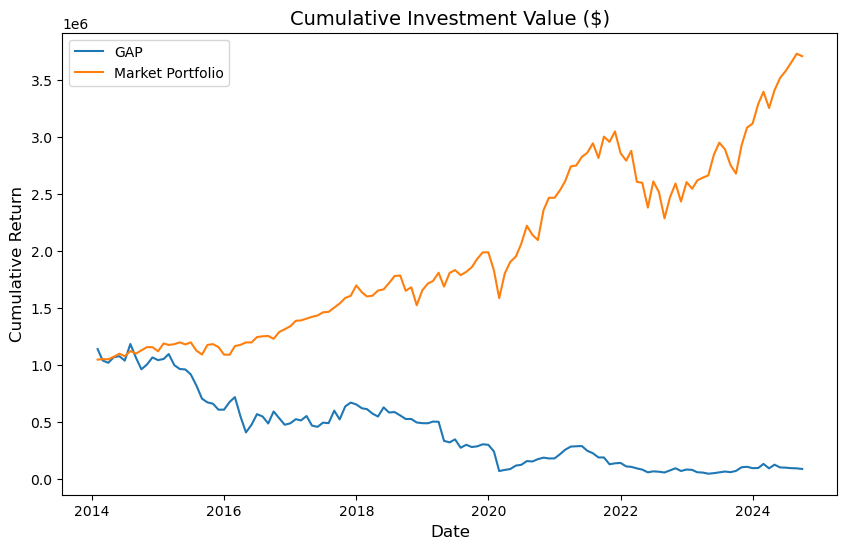

In [40]:
#it is a cell to build two portfolios that including market portfolio and and GAP only, respectively. You can clearly compare the performance of these two stocks.
# Buy and hold is not the only strategy to help you receive profit. Short-selling or buy a put option can also help you to generate a massive profit. 

initial_investment = 1000000

r_c_market = initial_investment *(1+ (reg_factor_3["Mkt-RF"]+ reg_factor_3["RF"])/100).cumprod()
r_c_gap = initial_investment * (1+reg_factor_3["GAP"]/100).cumprod()
date = reg_factor_3["date"]

plt.figure(figsize=(10, 6))
plt.plot(date, r_c_gap, label = "GAP")
plt.plot(date, r_c_market, label = "Market Portfolio")
plt.title('Cumulative Investment Value ($)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend()
plt.show()

#### Then what about other stocks?
- **STOCK PITCH BASED ON THE COEFFICIENT OF FACTOR**. You may wonder which stock is better to hold between Walmart, Tesla, Coca Cola and McDonald. One of factors, which is SMB, may can reveal the answer. Based on the coefficient SMB, which are  -0.5191, 0.8965,  -0.6969, and  -0.4493 for Walmart, Tesla, Coca Cola and McDonald respectively. SMB factor reveals that small stocks (companies with small market capitalization) generate excess returns compared to large stocks (companies with large market capitalization). By ordering these four stocks, you should by Tesla first, then McDonald, Walmart and Coca Cola.  


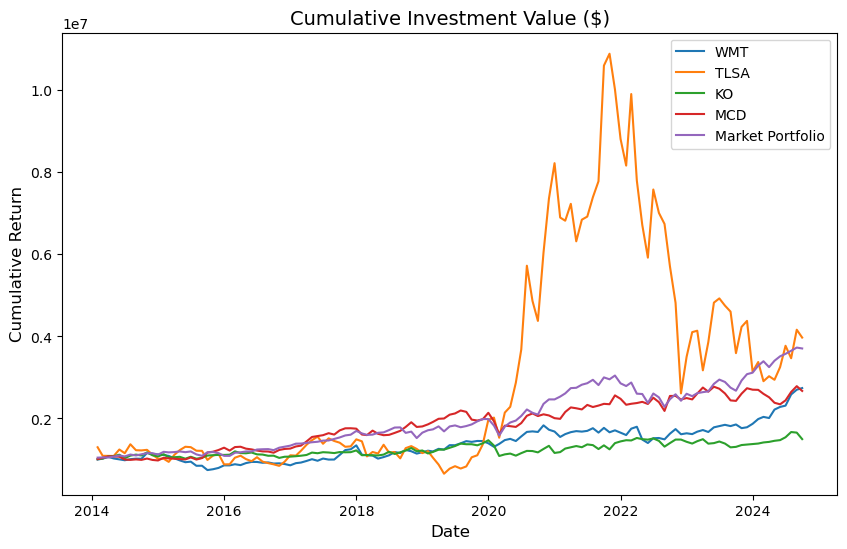

In [41]:
#it is a cell to build several portfolios that including market portfolio or targeted stock only, respectively. You can clearly compare the performance of these stocks and market portfolio.
# Buy and hold is not the only strategy to help you receive profit. Short-selling or buy a put option can also help you to generate a massive profit. 

r_c_wmt = initial_investment * (1+reg_factor_3["WMT"]/100).cumprod()
r_c_tsla = initial_investment * (1+reg_factor_3["TSLA"]/100).cumprod()
r_c_ko = initial_investment * (1+reg_factor_3["KO"]/100).cumprod()
r_c_mcd = initial_investment * (1+reg_factor_3["MCD"]/100).cumprod()

date = reg_factor_3["date"]

plt.figure(figsize=(10, 6))
plt.plot(date, r_c_wmt, label = "WMT")
plt.plot(date, r_c_tsla, label = "TLSA")
plt.plot(date, r_c_ko, label = "KO")
plt.plot(date, r_c_mcd, label = "MCD")
plt.plot(date, r_c_market, label = "Market Portfolio")
plt.title('Cumulative Investment Value ($)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend()
plt.show()

In [42]:
### In-class practice 2: Fama and French developed 5-factor model in 2014. Now pick 4 stocks you prefer, clean the data and rerun the regression. 
### Discuss your results and seek any potential trading strategy and interpret your stock pitch.
### For the entire process, you need to fill out the rest of cells based on my requirements.

In [43]:
#step 1: load the monthly close price data based your your selection. Convert your closing price to a monthly return. 
#Note: You should consider stocks with at least 8 years historical price. Fama and French's factor models works better by the assumption about holding a security with a relatively long time. 








In [44]:
#step 2: load the 5-factor dataset and clean. Based on the dataset you retrieved from step 1, what part of data do you need to delete?









In [45]:
#step 3: combine the two datasets you generated from step 1 and step 2 together. 
#note: The number in the 5-factor dataset is presented as percentage, for example, 0.5 means 0.5%. The return dataset you retrieved in step 1 is calculated as decimal. 
#For your further calculation, you need to make your data consistence, either both percentage or both decimals. 
#To merge two data properly, you need to make sure both of these two datasets have same index.










In [46]:
#step 4: calculate excess returns for each stock and identify several dependent variables and independent variables, respectively.
#note: you need to add constant before running regression.









In [47]:
#step 5: run different regression based on 5-factor model. Discuss your finding. 
# Cell for stock 1












In [48]:
#step 5: run different regression based on 5-factor model. Discuss your finding. 
# Cell for stock 2













In [49]:
#step 5: run different regression based on 5-factor model. Discuss your finding. 
# Cell for stock 3
















In [50]:
#step 5: run different regression based on 5-factor model. Discuss your finding. 
# Cell for stock 4















# Section 4: Linear Regression Application 4: Find Your Factors and Build Your Factor Model

Because of the flexibility of APT, investors have a high degree of freedom in selecting factors. Therefore, when creating your own financial model based on APT, you can choose tradable assets in the market (such as ETFs that track various financial indices) as factors. Such a multi-factor model can be used to hedge risks. Below are mathematical Interpretations:

Assume the return of targeted asset  is $r_0$, and we can use other n assets's access return $r_n$ to interpret $r_0$. Thus the multi-factor model is built as:

$$
r_{0,t} - r_f = \alpha_0 + \beta_{0,1} \cdot r_1 + \beta_{0,2} \cdot r_2 + \dots + \beta_{0,n} \cdot r_n + \epsilon_0
$$

For the right hand side of equation, it can be treated as a portfolio with N asset, and the weight of each each asset is the beta we estimated in the regression. Based on this equation, we can hedge the risk of targeted asset by building a portfolio. 

Also, this equation can bring some potential arbitrage strategy. Based on the assumption of APT, the alpha, which is  the intercept of equation should be equal to 0. If you find a significant and positive alpha in this regression, it means the target asset is underpriced, the trading strategy would be buying targeted stock i, and sell the portfolio you estimated. Since the returns of targeted asset and portfolio differ only slightly, the prices of assets and portfolios are very close. As a result, the cost of holding a long position in an asset while simultaneously holding a short position in a portfolio is very low. As long as the alpha remains consistently positive, such a trading strategy can yield relatively stable and sustantial returns.

It's worth mentioning that building a effective and robust factor model is the job that most of hedge funds or trading firms are working on. Bridgewater associate own "All weather strategy" and "Pure alpha strategy", AQR Capital Management is well known by factor investment, etc. Monitor the market and find the potential factors and continously refine your factor model. 

In [51]:
# It's a quick example about building factor model.

#I will select some stocks to build my arbitrage or hedging strategy.

# I select SPDR S&P 500 ETF Trust (SPY) and Technology Select Sector SPDR Fund (XLK)


tickers = ["AAPL", "SPY", "XLK"]

p_close = yf.download(tickers, start_date, end_date, interval= freq)["Close"]

p_close




[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,SPY,XLK
Date,,,
2014-01-01 00:00:00+00:00,17.878571,178.179993,34.820000
2014-02-01 00:00:00+00:00,18.794287,186.289993,36.349998
2014-03-01 00:00:00+00:00,19.169287,187.009995,36.349998
2014-04-01 00:00:00+00:00,21.074642,188.309998,36.450001
2014-05-01 00:00:00+00:00,22.607143,192.679993,37.820000
...,...,...,...
2024-08-01 00:00:00+00:00,229.000000,563.679993,220.330002
2024-09-01 00:00:00+00:00,233.000000,573.760010,225.759995
2024-10-01 00:00:00+00:00,225.910004,568.640015,222.240005


In [52]:
r = np.log(p_close) - np.log(p_close.shift(1))

returns = r.dropna()

r_f = (1+0.03)**(1/12) - 1

reg_own_factor = pd.DataFrame()

reg_own_factor["r_aapl"] = returns["AAPL"] - r_f

reg_own_factor["r_spy"] = returns["SPY"] - r_f

reg_own_factor["r_xlk"] = returns["XLK"] -r_f

reg_own_factor


,r_aapl,r_spy,r_xlk
Date,,,
2014-02-01 00:00:00+00:00,0.047484,0.042044,0.040536
2014-03-01 00:00:00+00:00,0.017290,0.001391,-0.002466
2014-04-01 00:00:00+00:00,0.092295,0.004461,0.000281
2014-05-01 00:00:00+00:00,0.067729,0.020475,0.034430
2014-06-01 00:00:00+00:00,0.024820,0.013188,0.011450
...,...,...,...
2024-08-01 00:00:00+00:00,0.028218,0.020631,0.004502
2024-09-01 00:00:00+00:00,0.014850,0.015258,0.021880
2024-10-01 00:00:00+00:00,-0.033368,-0.011430,-0.018181


In [53]:
Y = reg_own_factor["r_aapl"]

X = reg_own_factor.iloc[:, 1:]

X = sm.add_constant(X)

reg_factor = sm.OLS(Y, X).fit()

print(reg_factor.summary())

                            OLS Regression Results                            
Dep. Variable:                 r_aapl   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     138.9
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           8.53e-33
Time:                        14:51:32   Log-Likelihood:                 226.59
No. Observations:                 131   AIC:                            -447.2
Df Residuals:                     128   BIC:                            -438.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.004      0.530      0.5

#### Based on this factor model, we can replicate Apple's return by constructing a portfolio with a 65% short position in SPY and a 165% long position in XLK, relative to the initial investment value. This portfolio effectively hedges against potential firm-specific risks associated with Apple, minimizing the likelihood of experiencing abnormal price drops. However, since the constant term in the regression model is statistically insignificant, this strategy does not provide an arbitrage opportunity. Without a significant alpha, the model cannot predict any persistent mispricing or excess returns that could be exploited for arbitrage.

In [54]:
## Now, try to build your own factor model and think about your potential trading strategy.







